## Practica 1

__Instrucciones:__

Con la finalidad de explorar las propiedades del modelo lineal vistas en clase, desarrolle las siguientes tareas.

- Genere un modelo lineal que será el modelo subyacente de una población para poder ajustar una regresión. El modelo debe de ser de una sola variable. Grafique este modelo. ✅
- Muestree N datos de la población y grafiquelos en conjunto con el modelo subjacente. No olvide añadir ruido a las muestras. ✅
- Ajuste un modelo lineal para las N muestras utilizando las estimaciones de los parámetros vistas en clase. Grafique el modelo ajustado en conjunto con el modelo de la población.✅
- Compruebe que la suma de los residuales es igual a cero. ✅
- Compruebe que la covarianza entre la característica y los residuales es igual a cero. ✅
- Pruebe que la media de la característica y la media de los valores objetivo está sobre la recta del modelo lineal ajustado. Grafíquelos.✅

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### Modelo lineal

In [29]:
def generar_modelo():
    m = np.random.normal(0, 1)
    b = np.random.normal(0, 1)
    return [0.3, 1]

modelo lineal simple con coeficientes de pendiente e intersección en el eje Y generados de manera aleatoria utilizando la distribución normal estándar, y luego devuelve estos parámetros en una lista.

In [30]:
def modelo_lineal(m, b, x):
    return m * x + b

función para calcular el valor de \( y \) para el modelo lineal dado los valores de \( m \), \( b \), y \( x \) utilizando la fórmula de la línea recta.

In [31]:
N = 200
min_x = 0
max_x = 21

In [32]:
m, b = generar_modelo()
x = np.linspace(min_x, max_x, N)
lm = modelo_lineal(m, b, x)

modelo lineal aleatorio con m y b, crea un conjunto de valores de entrada x, y calcula los valores de salida lm basados en ese modelo lineal.

##### Crear poblacion

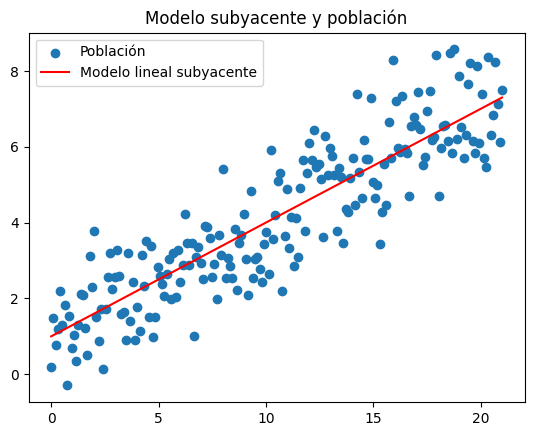

In [33]:
y = lm + np.random.normal(0, 1, N)
plt.scatter(x, y, label="Población")
plt.plot(x, lm, label="Modelo lineal subyacente", color="red")
plt.legend()
plt.title("Modelo subyacente y población")
plt.show()

#### Sampling

Gráfico de dispersión de 200 puntos de datos seleccionados aleatoriamente de las variables x e y.

In [34]:
n_muestra = 5
idx_x_muestra = np.random.randint(0, N, n_muestra)
x_muestra = x[idx_x_muestra]
y_muestra = y[idx_x_muestra]


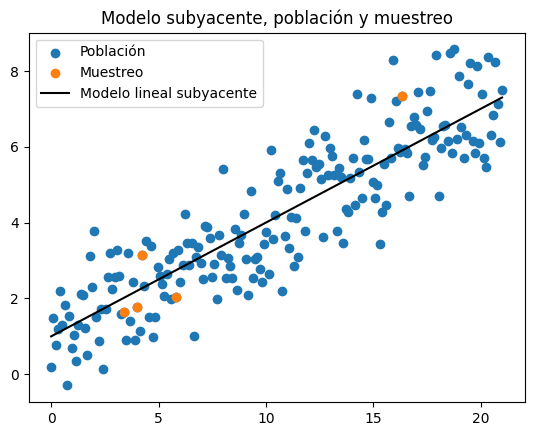

In [35]:
plt.scatter(x, y, label="Población")
plt.scatter(x_muestra, y_muestra, label="Muestreo")
plt.plot(x, lm, label="Modelo lineal subyacente", color="black")
plt.legend()
plt.title("Modelo subyacente, población y muestreo")
plt.show()


In [36]:
def ajuste_lineal_modelo(X, y):
    m_ajustado = np.cov(X, y)[0, 1] / np.var(X)
    b_ajustado = np.mean(y) - m_ajustado * np.mean(X)
    return [m_ajustado, b_ajustado]

Esta función realiza un ajuste lineal a los datos de entrada y salida  y devuelve los coeficientes de pendiente e intersección que mejor se ajustan a esos datos.

In [37]:
# Crear un arreglo de numeros 1 
unos_arreglo = np.ones(len(x_muestra))
# Concatenar los arreglos.
A = np.vstack([x_muestra, unos_arreglo]).T
# Ajuste del modelo.
m_ajustado, c_ajustado = np.linalg.lstsq(A, y_muestra, rcond=None)[0]
# Impresión del modelo lineal ajustado.
print(m_ajustado, c_ajustado)

0.4234268492438748 0.3329613967959546


In [38]:
# Implentación de la función de ajuste del modelo lineal.
m_adj_1, b_adj_1 = ajuste_lineal_modelo(x_muestra, y_muestra)
# Impresión del modelo lineal ajustado.
print(m_adj_1, b_adj_1)

0.5292835615548436 -0.3819703687615421


Impresión del modelo lineal poblacional. 

In [39]:
print(m, b)

0.3 1


In [40]:
# Primera Implementación.
lm_adj = modelo_lineal(m_ajustado, c_ajustado, x)
# Segunda Implementacón.
lm_adj_1 = modelo_lineal(m_adj_1, b_adj_1, x)

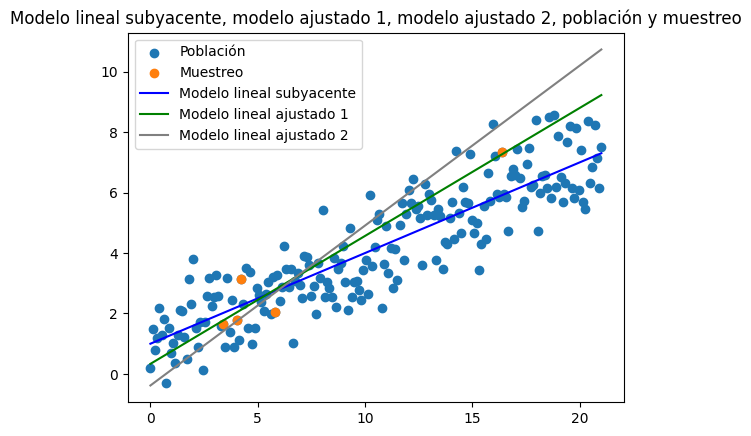

In [41]:
# Gráfica de modelo subyacente, modelo ajustado 1, modelo ajustado 2, población y muestreo
plt.scatter(x, y, label="Población")
plt.scatter(x_muestra, y_muestra, label="Muestreo")
plt.plot(x, lm, label="Modelo lineal subyacente", color="blue")
plt.plot(x, lm_adj, label="Modelo lineal ajustado 1", color="green")
plt.plot(x, lm_adj_1, label="Modelo lineal ajustado 2", color="gray")
plt.legend()
plt.title("Modelo lineal subyacente, modelo ajustado 1, modelo ajustado 2, población y muestreo")
plt.show()

In [42]:
# Residuos Modelo Lineal 1.
y_adjusted = lm_adj[idx_x_muestra]
resids = y_muestra - y_adjusted

# Residuos Modelo Lineal 2.
y_adjusted_1 = lm_adj_1[idx_x_muestra]
resids_1 = y_muestra - y_adjusted_1

Verifica que la suma de los residuales es igual a cero.

In [43]:
# Modelo Lineal 1.
assert np.isclose(np.sum(resids), 0), 'Error: La suma de los residuales de la implementación 1 no se acerca a cero'
# Modelo Lineal 2.
assert np.isclose(np.sum(resids_1), 0), 'Error: La suma de los residuales de la implementación 2 no se acerca a cero'

Verifica que la covarianza entre la característica y los residuales es igual a cero

In [44]:
# Modelo Lineal 1.
cov = np.cov(x_muestra, resids)[0, 1]
assert np.isclose(cov, 0), 'Error: La covarianza de la implementación 1 no se acerca a cero, cov' + str(cov)

# Modelo Lineal 2.
cov_1 = np.cov(x_muestra, resids_1)[0, 1]
assert np.isclose(cov_1, 0, atol=5e-1), 'Error: La covarianza de la implementación 2 no se acerca a cero, cov: ' + str(cov_1)

AssertionError: Error: La covarianza de la implementación 2 no se acerca a cero, cov: -3.1350959202656625

In [45]:
# Prueba que la media de la característica y la media de los valores objetivo está sobre la recta del modelo lineal ajustado.
media_x_sample = np.mean(x_muestra)
media_y_sample = np.mean(y_muestra)

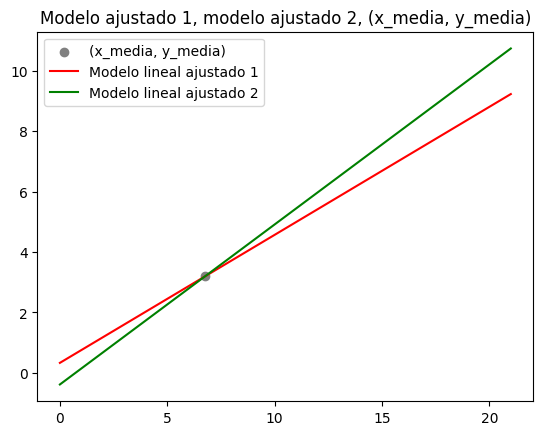

In [46]:
# Gráfica del modelo ajustado 1, modelo ajustado 2, (x_media, y_media)
plt.scatter(media_x_sample, media_y_sample, label="(x_media, y_media)", color='grey')
plt.plot(x, lm_adj, label="Modelo lineal ajustado 1", color="red")
plt.plot(x, lm_adj_1, label="Modelo lineal ajustado 2", color="green")
plt.legend()
plt.title("Modelo ajustado 1, modelo ajustado 2, (x_media, y_media)")
plt.show()

## PRACTICA 2

- __Con la finalidad de observar que las propiedades teóricas de los estimadores OLS se cumplen en la práctica, realice las siguientes tareas:__

1. Compruebe que los estimadores OLS no tienen sezgo.
2. Compruebe que las varianzas de los estimadores OLS son cercanas a sus valores teóricos.
3. Grafique los histogramas de los estimadores OLS.

__Theorem: Unbiasedness of OLS__

In [47]:
N = 500
min_x = 0
max_x = 21
m, b = generar_modelo()
x = np.linspace(min_x, max_x, N)
lm = modelo_lineal(m, b, x)

Generación de muestras

In [48]:
def generar_muestra(min_x, max_x, m, b, n_sample = 50):
    x_sample = np.random.randint(min_x, max_x, n_sample)
    lm = modelo_lineal(m, b, x_sample)
    y_sample = lm + np.random.normal(0, 1, n_sample)
    return [x_sample, y_sample]

In [49]:
nom_samples = 10000
sampling_values = list()
for i in range(nom_samples):
   
    x_sample, y_sample = generar_muestra(min_x, max_x, m, b)
    m_adj, b_adj = ajuste_lineal_modelo(x_sample, y_sample)
    sampling_values.append([x_sample, y_sample, m_adj, b_adj])

Generamos lista de m y b ajustados.

### Compruebe que los estimadores OLS no tienen sesgo.

Promedios de los parámetros m y b de  los ajustes de las muestras aleatorias.

In [50]:

valor_verdadero_m = m
valor_verdadero_b = b

m_adjs = [i[-2] for i in sampling_values]
b_adjs = [i[-1] for i in sampling_values]

m_mean = np.mean(m_adjs)
b_mean = np.mean(b_adjs)

sesgo_m = m_mean - valor_verdadero_m
sesgo_b = b_mean - valor_verdadero_b

print("Estimadores m -> " + str(m) + " y promedio m: " +  str(m_mean))
print("Estimadores b -> " + str(b) + " y promedio b: " +  str(b_mean))
print("-------------------------------------------------------------")
print("Sesgo de m_mean:", sesgo_m)
print("Sesgo de b_mean:", sesgo_b)

Estimadores m -> 0.3 y promedio m: 0.30604509649498834
Estimadores b -> 1 y promedio b: 0.9403005267811605
-------------------------------------------------------------
Sesgo de m_mean: 0.006045096494988356
Sesgo de b_mean: -0.059699473218839505


### Histogramas de los estimadores OLS

#### Histograma de los estimadores de b.

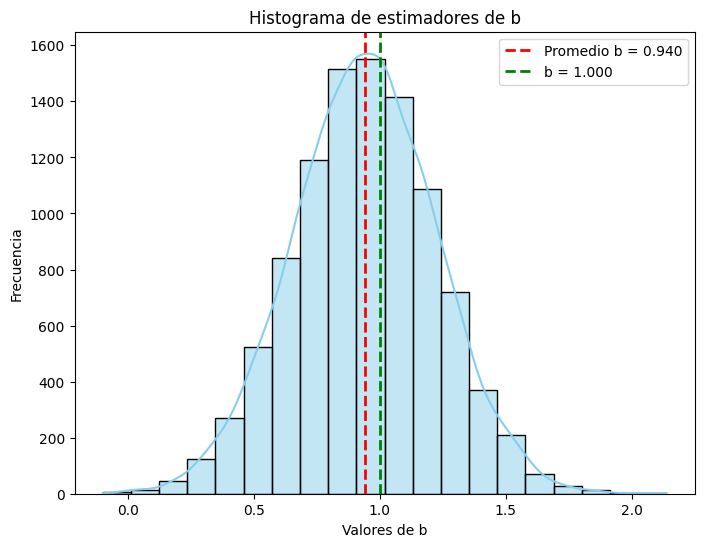

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(8, 6))
sns.histplot(b_adjs, bins=20, kde=True, color='skyblue')
plt.title("Histograma de estimadores de b")

plt.axvline(b_mean, color='red', linestyle='dashed', linewidth=2, label=f'Promedio b = {b_mean:.3f}')
plt.axvline(b, color='green', linestyle='dashed', linewidth=2, label=f'b = {b:.3f}')
plt.legend()
plt.xlabel("Valores de b")
plt.ylabel("Frecuencia")
plt.show()


#### Histograma de los estimadores de m.

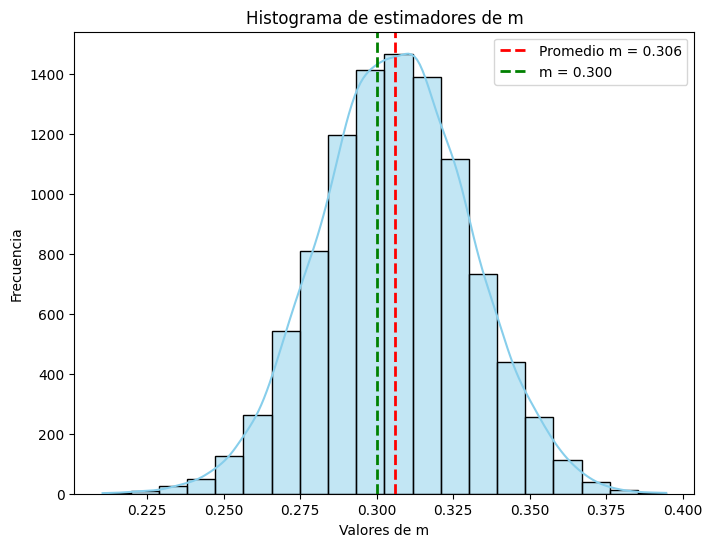

In [53]:

plt.figure(figsize=(8, 6))
sns.histplot(m_adjs, bins=20, kde=True, color='skyblue')
plt.title("Histograma de estimadores de m")
plt.axvline(m_mean, color='red', linestyle='dashed', linewidth=2, label=f'Promedio m = {m_mean:.3f}')
plt.axvline(m, color='green', linestyle='dashed', linewidth=2, label=f'm = {m:.3f}')
plt.legend()
plt.xlabel("Valores de m")
plt.ylabel("Frecuencia")
plt.show()

1. Varianza del estimador de la pendiente (m):


$\text{Var}(\hat{\beta}_1) = \frac{\sigma^2}{\sum_{i=1}^{N}(x_i - \bar{x})^2}$


- $(\sigma^2)$ es la varianza de los errores en el modelo (el término de error en la regresión).
- $(N)$ es el tamaño de la muestra.
- $(x_i)$ son los valores de la variable independiente.
- $(\bar{x})$ es la media de los valores de la variable independiente.

2. Varianza del estimador de la ordenada al origen (b):


$\text{Var}(\hat{\beta}_0) = \sigma^2 \left(\frac{1}{N} + \frac{\bar{x}^2}{\sum_{i=1}^{N}(x_i - \bar{x})^2}\right)$


### Compruebe que las varianzas de los estimadores OLS son cercanas a sus valores teóricos

In [54]:
import numpy as np

def calcular_varianza_y_promedio(sampling_values):
    #1.
    b_adjs = [i[-1] for i in sampling_values]
    m_adjs = [i[-2] for i in sampling_values]
    
    b_var = np.var(b_adjs)
    m_var = np.var(m_adjs)


    var_b1 = []
    var_b0 = []

    
    for iteration_value in sampling_values:
        
        x_values = iteration_value[0]
        y_values = iteration_value[1]
        x_mean = np.mean(x_values)
        y_adj = modelo_lineal(iteration_value[2], iteration_value[3], x_values)
        
        # residos
        residuals = y_values - y_adj
        
        # Calculamos  la Suma de Squared Residuals
        ssr = np.sum(residuals ** 2)
        
        # Calculamos SST_X (Sum of Squares Total para  X)
        sst_x = np.sum((x_values - x_mean) ** 2)
        
        # Calculamos el estimador de varianza
        var_est = ssr / (len(residuals) - 2)
        
        # Agregamos los valores estimados para b1 y b0
        var_b1.append(var_est / sst_x)
        var_b0.append(var_est / (len(residuals) * sst_x) * np.sum(x_values ** 2))

    # Calculamos los promedios de las varianzas estimadas
    mean_var_b1 = np.mean(var_b1)
    mean_var_b0 = np.mean(var_b0)

    return b_var, m_var, mean_var_b0, mean_var_b1


In [55]:
# Llama a la función con tus valores de sampling_values
b_var, m_var, mean_var_b0, mean_var_b1 = calcular_varianza_y_promedio(sampling_values)

# Imprimimos los resultados.
print("Varianza de b es: " + str(b_var) + ", Promedio de estimadores de b0 es: " + str(mean_var_b0))
print("Varianza de m es: " + str(m_var) + ", Promedio de estimadores de b1 es: " + str(mean_var_b1))

Varianza de b es: 0.08045763724378309, Promedio de estimadores de b0 es: 0.07723800920151547
Varianza de m es: 0.0005962489349861536, Promedio de estimadores de b1 es: 0.0005671877665228776
